<img src="./assets/img/teclab_logo.png" alt="Teclab logo" width="170">

**Author**: Hector Vergara ([LinkedIn](https://www.linkedin.com/in/hector-vergara/))

**Repository**: [nlp_apis](https://github.com/hhvergara/nlp_apis)

**Python Notebook**: [API1.ipynb](https://github.com/hhvergara/nlp_apis/blob/main/API1.ipynb)

----

# API 1:

### Contexto

La concesionaria AutoFlex, donde trabajamos como parte de una célula Data Science, está preocupada por la aceptación de la nueva versión de su marca estrella.
Se han recibido muchos comentarios en redes sociales al respecto, y claramente se quiere optimizar el costo de procesamiento de esas opiniones.

Para ello, desea interpretar esos comentarios utilizando el preprocesamiento de texto e implementar un modelo para resumir las opiniones de manera automática. El equipo de trabajo propone realizar un análisis de sentimientos que clasifique cada texto escrito, ya que la gerencia comercial tiene un conjunto de comentarios clasificados como “bueno”, “malo” o “info” (necesita más información).

Debemos realizar, primero, una descarga de la base, y terminar de sustentar metodológicamente el proyecto.

### Consignas
1.	En primer lugar, debemos sustentar metodológicamente:

    a.	¿Qué tipo de aplicación es un análisis de sentimientos? Por favor, en un párrafo de no más 6 líneas, explique en qué consiste, de manera que la gerencia de analítica lo comprenda fácilmente.
    b.	¿Qué tipo de procesamiento es necesario realizar primero? Exponga en un dibujo los pasos que va a realizar sobre los comentarios con el fin de convertirlos en data estructurada.

2.	La gerencia de marketing le ha entregado una tabla con diferentes comentarios de los clientes, la cual se llama “comentarios.csv”. Primeramente, realice una lectura de los datos. Para ello, use el método read_csv en vez de read_table; utilice como separador la coma (,). Indique cuántos registros tiene la tabla y cuántas columnas; visualice los 20 primeros registros.

3.	Realice un análisis exploratorio de esta data encontrando el porcentaje de tipo de comentarios que han sido clasificados como malos, buenos o información, aplique el código Python que considere necesario y exprese el resultado en una tabla.

4.	Diseñe un patrón de expresión regular para utilizarlo como tokenizador más adelante, que además de las palabras en idioma español, lea los emojis como 🥰❤. También considere la expresión como “:)” como un solo token, pero que excluya la puntuación punto “.”, coma “,” y punto y coma “;”.

5.	Defina el conjunto X como los comentarios del data frame, y el target, y como la columna tipo.

### 💬 Respuestas al punto numero 1:

*a)	¿Qué tipo de aplicación es un análisis de sentimientos? Por favor, en un párrafo de no más 6 líneas, explique en qué consiste, de manera que la gerencia de analítica lo comprenda fácilmente.*

**Respuesta:**

*El análisis de sentimientos es una de las aplicaciones dentro del campo del procesamiento de lenguaje natural (NLP) y su objetivo es la interpretación del tono emocional de textos escritos por personas.
Para este caso puntual, el requerimiento apunta a clasificar los comentarios de los clientes para tener una mirada general sobre la aceptación de la nueva versión de su marca estrella, de manera tal que permita mejorar la toma de decisiones por parte de la gerencia.*

*b)	¿Qué tipo de procesamiento es necesario realizar primero? Exponga en un dibujo los pasos que va a realizar sobre los comentarios con el fin de convertirlos en data estructurada.*

**Respuesta:**

<img src="./assets/img/1_b drowing.png" alt="Teclab logo" style="padding-left:15%">


In [16]:
import os
import re
import numpy as np
import pandas as pd
from pathlib import Path
import plotly.express as px
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

__version__ = '0.0.1'
__email__ = 'hhvservice@gmail.com'
__author__ = 'Hector Vergara'
__annotations__ = 'https://www.linkedin.com/in/hector-vergara/'
__base_dir__ = Path().absolute()
__data_dir__ = os.path.join(__base_dir__, 'data')
filename_data = os.path.join(__data_dir__, 'comentarios.csv')


## ✅ Exploring and cleaning the data

*2.	La gerencia de marketing le ha entregado una tabla con diferentes comentarios de los clientes, la cual se llama “comentarios.csv”. Primeramente, realice una lectura de los datos. Para ello, use el método read_csv en vez de read_table; utilice como separador la coma (,). Indique cuántos registros tiene la tabla y cuántas columnas; visualice los 20 primeros registros.*

In [17]:
df = pd.read_csv(filename_data, sep=',')
df.head(20)

,orden,comentario,tipo
0,1,"No les creo nada ,",malo
1,2,Está bonita la camioneta,bueno
2,3,Quiero más información,info
3,4,:( igual el crédito ha de ser muuuucho,malo
4,5,"Quisiera, más información, pero nadie me respo...",info
5,6,"cuota chica, pero digan la última cuota, de se...",malo
6,7,"Yo tengo uno claro la versión anterior ,,me ha...",bueno
7,8,"No lo compres, son fabricados en méxico",malo
8,9,"🥰❤❣💯, amo esta marca",bueno
9,10,más IVA? Ni que la weá la uses como camioneta,malo


In [18]:
print(f'''
Cantidad de filas: {df.shape[0]}
Cantidad de columnas: {df.shape[1]}
''')


Cantidad de filas: 600
Cantidad de columnas: 3



*3.	Realice un análisis exploratorio de esta data encontrando el porcentaje de tipo de comentarios que han sido clasificados como malos, buenos o información, aplique el código Python que considere necesario y exprese el resultado en una tabla.*

<Axes: title={'center': 'Distribucion de tipos de comentarios'}, xlabel='tipo'>

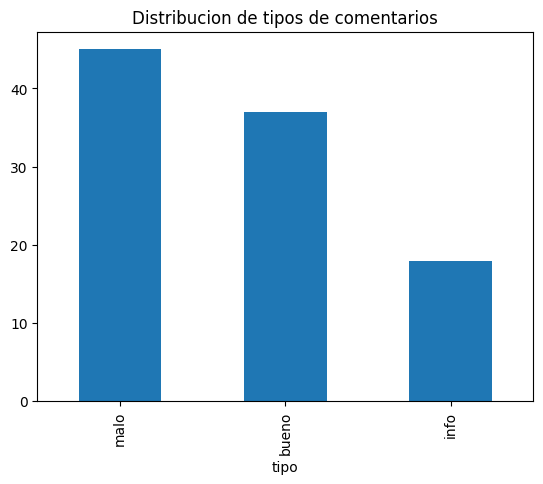

In [19]:
df['tipo'].value_counts(normalize=True).apply(lambda x: x*100).plot(kind='bar', title='Distribucion de tipos de comentarios')

*4.	Diseñe un patrón de expresión regular para utilizarlo como tokenizador más adelante, que además de las palabras en idioma español, lea los emojis como 🥰❤. También considere la expresión como “:)” como un solo token, pero que excluya la puntuación punto “.”, coma “,” y punto y coma “;”.*

In [20]:

texto = "Me encantó el auto nuevo 🥰, pero esperaba más potencia :) ¿Qué opinan ustedes?"

pattern = r"""(
    [\U0001F600-\U0001F64F]           |  # emojis clásicos (caras)
    [\U0001F300-\U0001F5FF]           |  # otros emojis (símbolos, naturaleza)
    [\U0001F680-\U0001F6FF]           |  # transporte y símbolos adicionales
    [\U0001F1E0-\U0001F1FF]           |  # banderas
    [\U00002700-\U000027BF]           |  # signos misceláneos
    [\U0001F900-\U0001F9FF]           |  # emojis adicionales (caras, gestos)
    [\U00002600-\U000026FF]           |  # símbolos adicionales como ☀☂
    ❤|🥰                              |  # emojis específicos mencionados
    :\)                               |  # emoticón :)
    \b\w+\b                           # palabras (alfanuméricas)
)"""

tokens = re.findall(pattern, texto, re.VERBOSE)
print(tokens)



['Me', 'encantó', 'el', 'auto', 'nuevo', '🥰', 'pero', 'esperaba', 'más', 'potencia', ':)', 'Qué', 'opinan', 'ustedes']


*5.	Defina el conjunto X como los comentarios del data frame, y el target, y como la columna tipo.*

In [21]:
x = df['comentario']
y = df['tipo']
print(x)
print(y)


0                                    No les creo nada , 
1                              Está bonita la camioneta 
2                                 Quiero más información
3                :( igual el crédito ha de ser muuuucho 
4      Quisiera, más información, pero nadie me respo...
                             ...                        
595    piezas de respuestos escasas y demoran mucho e...
596                      No sube muy bien las pendientes
597                       es la mejor SUV que he tenido 
598                  el crédito directo resulta muy caro
599                        la recomiendo a ojos cerrados
Name: comentario, Length: 600, dtype: object
0       malo
1      bueno
2       info
3       malo
4       info
       ...  
595     malo
596     malo
597    bueno
598     malo
599    bueno
Name: tipo, Length: 600, dtype: object
